<center><h1 style = "background:#000000 ;color:white;border:0;font-weight:bold">REGRESSION MASTER NOTEBOOK</h1></center>


Hey! In this notebook, I have covered regression techniques in detail. I explained the theoretical information about regression techniques, evaluation metrics and bias-variance tradeoff, which is one of the important issues of regression. I tried to explain each technique with different datasets. Three different datasets are used in this notebook:

1. House Sales in King County, USA
1. Ice Cream Revenue
1. Manufacturing cost

### In each main topic, I used the same template:

1. Information About Dataset
1. Data Visualization
1. Train-Test Split
1. Model
1. Evaluation of Model

In addition, in the Linear Regression section, I gave theoretical information about the metrics used in the evaluation of regression models, as well as coding.

### The main topics are:

1. [Simple Linear Regression](#1)
   1. [Evaluation Metrics](#5)
1. [Multiple Linear Regression](#2)
1. [Polynomial Regression](#3)
1. [Bias-Variance Tradeoff](#4)
   1. [Ridge Regression](#6)
   1. [Lasso Regression](#7)
   1. [Elastic Net](#8)
   
### Before starting:
* Main headings are indicated with a black background.
* The following color palettes are used for each main title.

In [3]:
print("test")

test


In [4]:
import seaborn as sns
headers = ['#000000']
print("Headers Color:")
sns.palplot(sns.color_palette(headers))
print()

ModuleNotFoundError: No module named 'seaborn'

Linear Regression Colors:



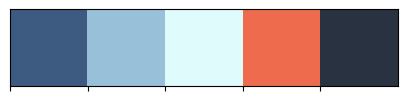

In [3]:
l_r = ['#3d5a80', '#98c1d9', '#e0fbfc', '#ee6c4d', '#293241']
print("Linear Regression Colors:")
sns.palplot(sns.color_palette(l_r))
print()

Multiple Linear Regression Colors:



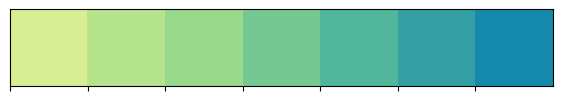

In [4]:
m_l_r = ['#d9ed92', '#b5e48c', '#99d98c', '#76c893', '#52b69a', '#34a0a4', '#168aad']
print("Multiple Linear Regression Colors:")
sns.palplot(sns.color_palette(m_l_r))
print()


Polynomial Regression Colors:



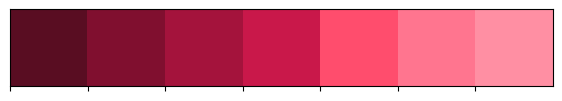

In [5]:
p_r = ['#590d22', '#800f2f', '#a4133c', '#c9184a', '#ff4d6d', '#ff758f', '#ff8fa3']
print("Polynomial Regression Colors:")
sns.palplot(sns.color_palette(p_r))
print()

Bias-Variance Tradeoff Colors:



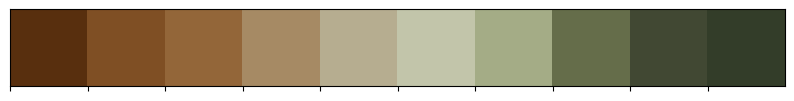

In [6]:
b_v_t = ['#582f0e', '#7f4f24', '#936639', '#a68a64', '#b6ad90', '#c2c5aa', '#a4ac86', '#656d4a', '#414833', '#333d29']
print("Bias-Variance Tradeoff Colors:")
sns.palplot(sns.color_palette(b_v_t))
print()

## Let's Start!

<a id = "1"></a>
<center><h1 style = "background:#000000 ;color:white;border:0;font-weight:bold">Simple Linear Regression</h1></center>

## What is linear regression?
Linear regression analysis is used to estimate the value of one variable relative to the value of another variable. The variable you want to predict is called the dependent variable. The variable you use to predict the value of the other variable is called the independent variable.

## Why is linear regression important?

Linear regression models are relatively simple and provide an easy-to-interpret mathematical formula that can produce predictions. Linear regression can be applied to a variety of fields in business and academic studies.

You can see linear regression used in everything from the biological, behavioral, environmental and social sciences to business. Linear regression models have become a scientifically proven method and they reliably predict the future. Because linear regression is a well-established statistical procedure, the properties of linear regression models can be well understood and trained very quickly.

## Simple Linear Regression Model

The simple linear regression model is a method used to estimate the dependent variable with the help of the independent variable when there is a linear relationship between the independent variable and the dependent variable.

\begin{equation}
Y=\beta_{0}+\beta_{1} X+\epsilon
\end{equation}

<SCRIPT SRC='https://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML'></SCRIPT>
<SCRIPT>MathJax.Hub.Config({ tex2jax: {inlineMath: [['$','$'], ['\\(','\\)']]}})</SCRIPT>

We can construct a linear model with the above equation. In this model, <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>&#x03B2;<!-- β --></mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mn>0</mn>
    </mrow>
  </msub>
</math> is the cutoff point, <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>&#x03B2;<!-- β --></mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mn>1</mn>
    </mrow>
  </msub>
</math> is the slope of the line, and ϵ is the error term.





In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./data\EconomiesOfScale.csv
./data\IceCreamData.csv
./data\kc_house_data.csv


<center><h1 style = "background:#3d5a80 ;color:white;border:0;font-weight:bold">Information About Dataset</h1></center>

In [8]:
df = pd.read_csv('./data/IceCreamData.csv')
df.sample(10)

Temperature     Revenue
91      9.073838  222.872317
131    20.475023  417.354839
479    18.508360  432.819795
137    28.547987  656.636523
164    28.459543  726.233771
467    26.530219  612.243721
17     42.515280  921.508275
392    10.119737  276.373374
132    19.433268  448.471335
50      6.393835  190.710941

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [10]:
df.describe()

Temperature      Revenue
count   500.000000   500.000000
mean     22.232225   521.570777
std       8.096388   175.404751
min       0.000000    10.000000
25%      17.122258   405.558681
50%      22.392791   529.368565
75%      27.740674   642.257922
max      45.000000  1000.000000

<center><h1 style = "background:#98c1d9 ;color:black;border:0;font-weight:bold">Data Visualization</h1></center>

<Figure size 1280x960 with 0 Axes>

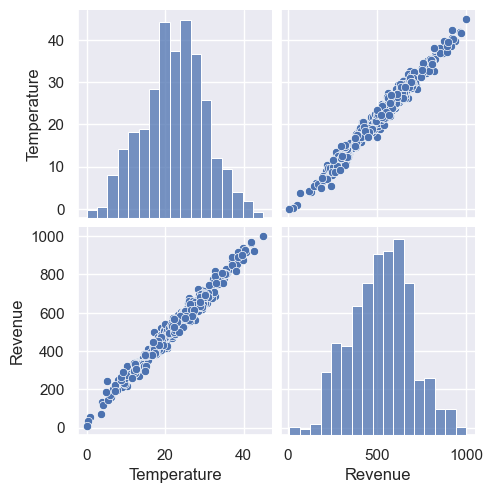

In [11]:
plt.figure(dpi = (200))
sns.pairplot(df)

<Figure size 640x480 with 0 Axes>

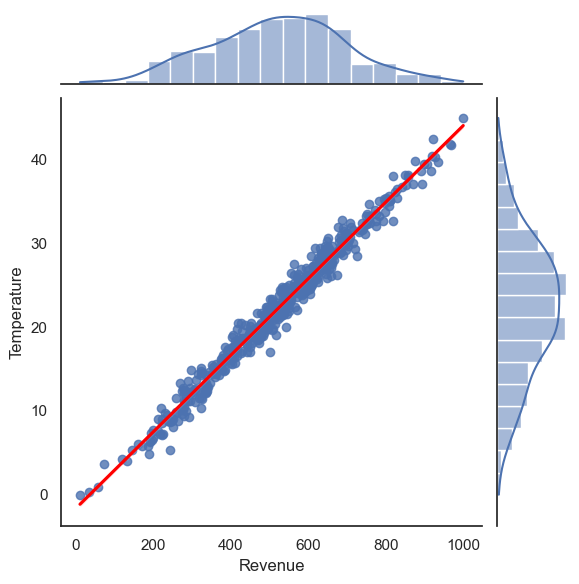

In [12]:
sns.set_theme(style="white")
plt.figure(dpi = (100))
sns.jointplot(x = df['Revenue'], y = df['Temperature'], kind='reg', line_kws={"color": "red"})

<Axes: xlabel='Revenue', ylabel='Temperature'>

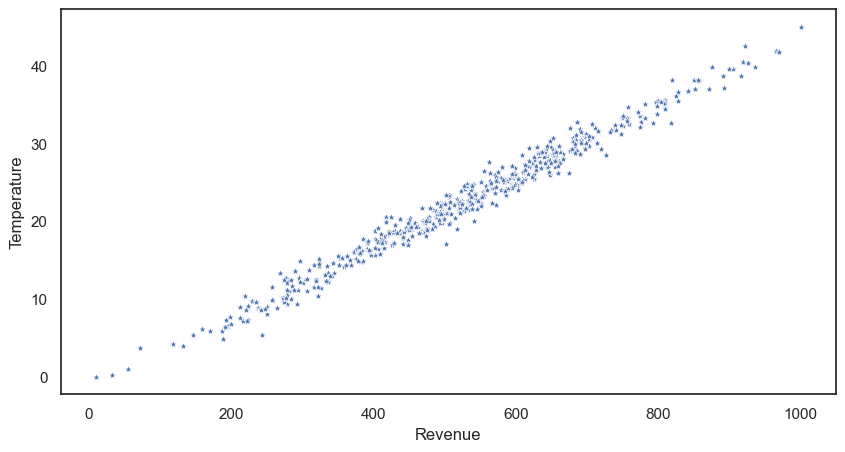

In [13]:
plt.figure(figsize = (10,5), dpi = (100))
sns.scatterplot(x = df['Revenue'], y = df['Temperature'], marker="*")

<center><h1 style = "background:#e0fbfc ;color:black;border:0;font-weight:bold">Train-Test Split</h1></center>

In [14]:
from sklearn.model_selection import train_test_split

X = df[['Temperature']]
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 101)

print(f'Total # of sample in whole dataset: {len(X)}')
print("*****"*10)
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Shape of X_train: {X_train.shape}')
print("*****"*10)
print(f'Total # of sample in test dataset: {len(X_test)}')
print(f'Shape of X_test: {X_test.shape}')

Total # of sample in whole dataset: 500
**************************************************
Total # of sample in train dataset: 335
Shape of X_train: (335, 1)
**************************************************
Total # of sample in test dataset: 165
Shape of X_test: (165, 1)


<center><h1 style = "background:#ee6c4d ;color:white;border:0;font-weight:bold">Linear Regression</h1></center>

**fit_intercept** : bool, default=True
Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).

**normalize** : bool, default=False
This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use StandardScaler before calling fit on an estimator with normalize=False.

**copy_X** : bool, default=True
If True, X will be copied; else, it may be overwritten.

**n_jobs** : int, default=None
The number of jobs to use for the computation. This will only provide speedup for n_targets > 1 and sufficient large problems. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. 

**positive** : bool, default=False
When set to True, forces the coefficients to be positive. This option is only supported for dense arrays.

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)

**METHOD** : *fit(X, y[, sample_weight])* --> It fits linear model.

**X** : {array-like, sparse matrix} of shape (n_samples, n_features)

Training data.

**y** :array-like of shape (n_samples,) or (n_samples, n_targets)

Target values. Will be cast to X’s dtype if necessary

**sample_weight** : array-like of shape (n_samples,), default=None

Individual weights for each sample

**returns** : **self** : returns an instance of self.

In [16]:
model.fit(X_train, y_train)

LinearRegression()

**METHOD** : *predict(X, y[, sample_weight])* --> Predicts test values using the linear model.

**X** : array-like or sparse matrix, shape (n_samples, n_features)

Test samples.

**returns** : **C** --> array, shape (n_samples,)

It returns predicted values.

In [17]:
pred = model.predict(X_test)

**METHOD** : *score(X, y[, sample_weight])* --> Return the coefficient of determination <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msup>
    <mi>R</mi>
    <mn>2</mn>
  </msup>
</math> of the prediction.

**X** : array-like of shape (n_samples, n_features)

Test samples. For some estimators this may be a precomputed kernel matrix or a list of generic objects instead with shape (n_samples, n_samples_fitted), where n_samples_fitted is the number of samples used in the fitting for the estimator.

**y** : array-like of shape (n_samples,) or (n_samples, n_outputs)

True values for X.

**returns** : **score** --> float

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <msup>
    <mi>R</mi>
    <mn>2</mn>
  </msup>
</math> of self.predict(X) wrt. y.

In [18]:
train_score = model.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = model.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 97.86733638283377
Test score of trained model: 98.18365687594093


**NOTE:** All the method explanations were taken from scikit-learn documentation. 

*Source for explanations of parameters* : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

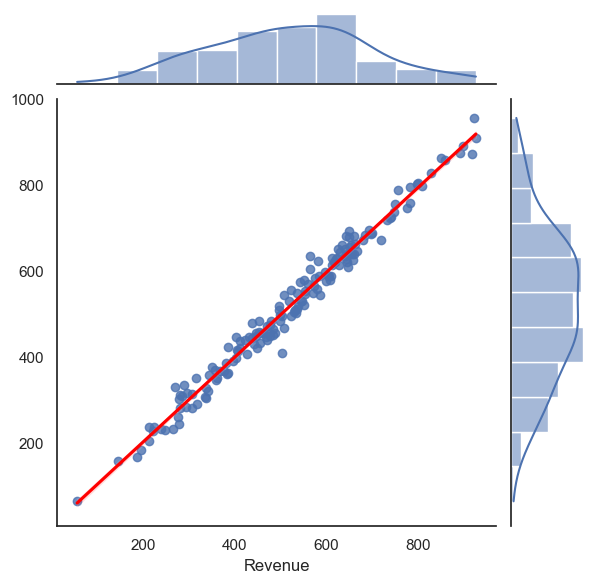

In [19]:
sns.set_theme(style="white")
sns.jointplot(x=y_test, y=pred, kind='reg', line_kws={"color": "red"})

<a id = "5"></a>
<center><h1 style = "background:#293241 ;color:white;border:0;font-weight:bold">Evaluation of Model</h1></center>

## Mean Squared Error

Mean Square Error (MSE) is the most commonly used regression loss function. MSE is the average loss of frames per sample across the entire dataset. To calculate the MSE, sum all frame losses for individual samples and then divide by the number of samples.

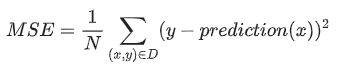

* x is the property the model uses to predict.
* The prediction (x) meaning is the predicted value according to the x property.
* y is the true value.
* N is the number of samples.

In [20]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:",mean_squared_error(y_test, pred))

Mean Squared Error: 549.2134978280799


## Root Mean Squared Error

It is a quadratic metric that measures the magnitude of the error, often used to find the distance between the predictor's predicted values and the actual values of a machine learning model. The standard deviation of the RMSE estimation errors (residues). That is, the residuals are a measure of how far the regression line is from the data points; RMSE is a measure of how far these residues spread. In other words, it tells you how dense that data is around the line that best fits the data. The RMSE value can range from 0 to infinity. Negative oriented scores, i.e. predictors with lower values, perform better. A zero RMSE value means the model made no mistakes. RMSE has the advantage of punishing large errors more so it may be better suited to some situations. RMSE prevents the unwanted use of absolute values in many mathematical calculations.

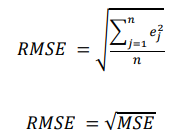

In [21]:
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred)))

Root Mean Squared Error: 23.435304517502644


## Mean Absolute Error

Absolute error is the difference between estimated values and actual values. To be exact, it is the mean of the absolute value of each difference between the actual value and the predicted value for that sample across the entire sample of the data set.



* y is the true value.
* y^ is the predicted value.

*A lower value indicates better accuracy.*

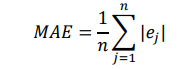

In [22]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error:",mean_absolute_error(y_test, pred))

Mean Absolute Error: 18.723628423305332


## Mean Absolute Percentage Error

In regression and time series models, mean absolute percent error is frequently used to measure the accuracy of predictions. If there are zero among the real values, the MAPE cannot be calculated as there will be division by zero. Percentage error cannot exceed 100% for very low predictive values, but there is no upper limit for the percentage error for very high predictive values. When MAPE is used to compare the accuracy of estimators, it is biased as it systematically selects a method that is too low for estimates. This small but serious problem can be overcome with an accuracy criterion that finds the ratio of predicted values to their true values. This approach leads to estimates that can be interpreted in terms of the geometric mean.

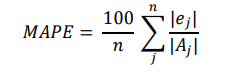

In [23]:
import sklearn.metrics as m
print("Mean Absolute Percentage Error:",np.mean(np.abs( (y_test-pred) / y_test))*100)

Mean Absolute Percentage Error: 4.210864067222878


## R square

R² is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination or the multiple coefficient of determination for multiple regression. To put it in simpler language, R-square is a measure of fit for linear regression models.



R-squared does not indicate whether a regression model fits your data adequately. A good model can have a low R-squared value. On the other hand, a biased model can have a high R-squared value!

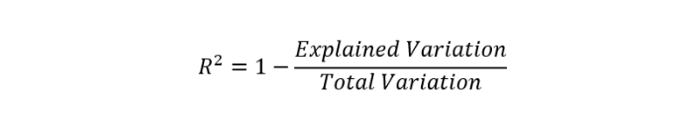

In [24]:
from sklearn.metrics import r2_score
print("R^2:",r2_score(y_test, pred))

R^2: 0.9818365687594093


## Adjusted R Squared

Each additional argument added to a model always increases the R² value.

As the independent variable is added, the model becomes more complex, when the model becomes complex, "overfitting" occurs. Hence R-squared increases.

Adjusted R-square comes into play to solve such problems. The adjusted R-square compensates for each independent variable and only increases when each given variable improves the model above what is possible.

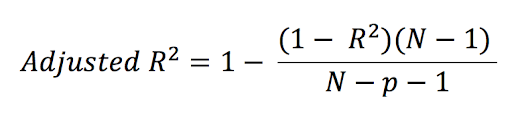

In [25]:
import sklearn.metrics as m
n=X_test.shape[0]
p=X_test.shape[1] - 1
R2 = m.r2_score(y_test, pred)

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

Adjusted R Squared: 0.9818365687594093


## Let's put it all together

In [26]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
MAPE = np.mean(np.abs( (y_test-pred) / y_test))*100
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

In [27]:
results = [MSE, RMSE, MAE, MAPE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

Metric       Score
0     MSE  549.213498
1    RMSE   23.435305
2     MAE   18.723628
3    MAPE    4.210864
4      r2    0.981837
5  adj_r2    0.981725

<a id = "2"></a>
<center><h1 style = "background:#000000 ;color:white;border:0;font-weight:bold">Multiple Linear Regression</h1></center>

It is an analysis to reveal the relationship between a dependent variable and a series of independent variables associated with it.

Multiple linear regression examines the linear relationship between two or more independent variables and one dependent variable. There is a correlation between dependent and independent variables in multiple regression. Let's denote the independent variables as X and the dependent variables as Y.

$$ {Y = XB + E}.$$

* Y: dependent variable observation vector
* X: independent variables observation matrix
* B: coefficients vector
* E: random error vector

<SCRIPT SRC='https://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML'></SCRIPT>
<SCRIPT>MathJax.Hub.Config({ tex2jax: {inlineMath: [['$','$'], ['\\(','\\)']]}})</SCRIPT>

$$ Simple Linear Regression --> {y =  b_0  + b_1 x_1}.$$

$$ Multiple Linear Regression --> {y =  b_0  + b_1 x_1  + b_2 x_2+⋯+ b_n x_n}.$$


In multiple linear regression, the degree of effect of each independent variable on the dependent variable is different from each other. Therefore, the coefficient of each variable need not be the same in addition to the equation in simple linear regression.

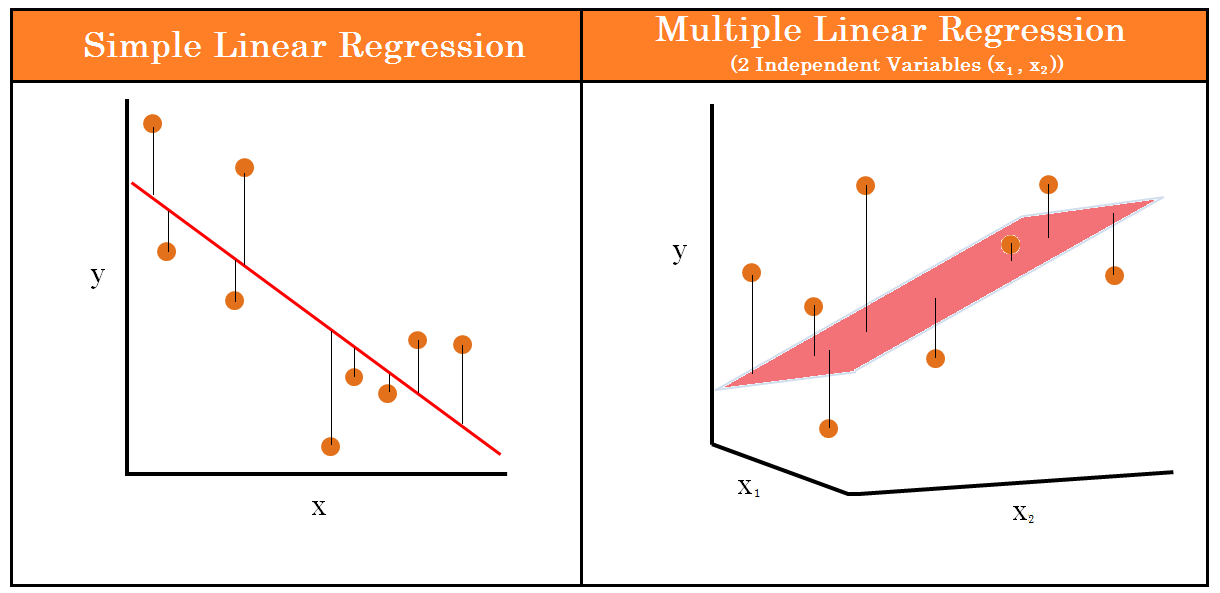

In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./data\EconomiesOfScale.csv
./data\IceCreamData.csv
./data\kc_house_data.csv


<center><h1 style = "background:#d9ed92 ;color:black;border:0;font-weight:bold">Information About Dataset</h1></center>

In [29]:
df = pd.read_csv('./data/kc_house_data.csv')
df.sample(10)

id             date      price  bedrooms  bathrooms  \
7752   4046700210  20140629T000000   345000.0         3       2.00   
12754   620069061  20150507T000000   450000.0         3       2.50   
5434   3723800086  20140624T000000   665000.0         6       2.75   
3841   3342700405  20140522T000000   585000.0         4       1.75   
2535    117000003  20140919T000000   595000.0         4       2.25   
12854  1732800865  20141002T000000  1300000.0         4       2.50   
2490   3905040070  20150504T000000   540000.0         3       2.50   
7615   1773100123  20141002T000000   285000.0         3       1.75   
2691   3820350070  20140929T000000   349950.0         4       2.50   
8260   3179100720  20141203T000000   602000.0         2       1.00   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
7752          1610     15005     1.0           0     0  ...      7   
12754         2880    426452     2.0           0     3  ...      7   
5434          2840      8346     1.0           0     0  ...      8   
3841          3000     42200     1.0           0     3  ...      7   
2535          1920      3225     1.5           0     0  ...      7   
12854         3470      4160     2.0           0     0  ...      9   
2490          1670      5146     2.0           0     0  ...      8   
7615          1100      1307     2.0           0     0  ...      7   
2691          1820      3134     2.0           0     0  ...      7   
8260          1470      6398     1.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
7752         1610              0      1986             0    98014  47.6886   
12754        2880              0      1979             0    98092  47.2485   
5434         1420           1420      1961             0    98118  47.5518   
3841         1500           1500      1950             0    98056  47.5265   
2535         1300            620      1923             0    98116  47.5848   
12854        2480            990      1927             0    98119  47.6300   
2490         1670              0      1991             0    98029  47.5707   
7615          780            320      2008             0    98106  47.5601   
2691         1820              0      1999             0    98019  47.7351   
8260          970            500      1941             0    98105  47.6716   

          long  sqft_living15  sqft_lot15  
7752  -121.911           1610       15479  
12754 -122.101           1460      320890  
5434  -122.266           2250        8346  
3841  -122.202           2500        9821  
2535  -122.384           1960        3750  
12854 -122.363           2280        5440  
2490  -121.999           1940        5146  
7615  -122.363           1170        4800  
2691  -121.985           1820        3751  
8260  -122.279           1950        6398  

[10 rows x 21 columns]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [31]:
df.describe().T

count          mean           std           min  \
id             21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price          21613.0  5.400881e+05  3.671272e+05  7.500000e+04   
bedrooms       21613.0  3.370842e+00  9.300618e-01  0.000000e+00   
bathrooms      21613.0  2.114757e+00  7.701632e-01  0.000000e+00   
sqft_living    21613.0  2.079900e+03  9.184409e+02  2.900000e+02   
sqft_lot       21613.0  1.510697e+04  4.142051e+04  5.200000e+02   
floors         21613.0  1.494309e+00  5.399889e-01  1.000000e+00   
waterfront     21613.0  7.541757e-03  8.651720e-02  0.000000e+00   
view           21613.0  2.343034e-01  7.663176e-01  0.000000e+00   
condition      21613.0  3.409430e+00  6.507430e-01  1.000000e+00   
grade          21613.0  7.656873e+00  1.175459e+00  1.000000e+00   
sqft_above     21613.0  1.788391e+03  8.280910e+02  2.900000e+02   
sqft_basement  21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_built       21613.0  1.971005e+03  2.937341e+01  1.900000e+03   
yr_renovated   21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode        21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat            21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long           21613.0 -1.222139e+02  1.408283e-01 -1.225190e+02   
sqft_living15  21613.0  1.986552e+03  6.853913e+02  3.990000e+02   
sqft_lot15     21613.0  1.276846e+04  2.730418e+04  6.510000e+02   

                        25%           50%           75%           max  
id             2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price          3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.427000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       5.040000e+03  7.618000e+03  1.068800e+04  1.651359e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
sqft_basement  0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built       1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long          -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05

In [32]:
df.drop('id', axis = 1, inplace = True)

<center><h1 style = "background:#b5e48c ;color:black;border:0;font-weight:bold">Data Visualization</h1></center>

In [33]:
df_v = df
df_v.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [34]:
df_v.drop(['date','zipcode', 'lat', 'long'], axis = 1, inplace = True)

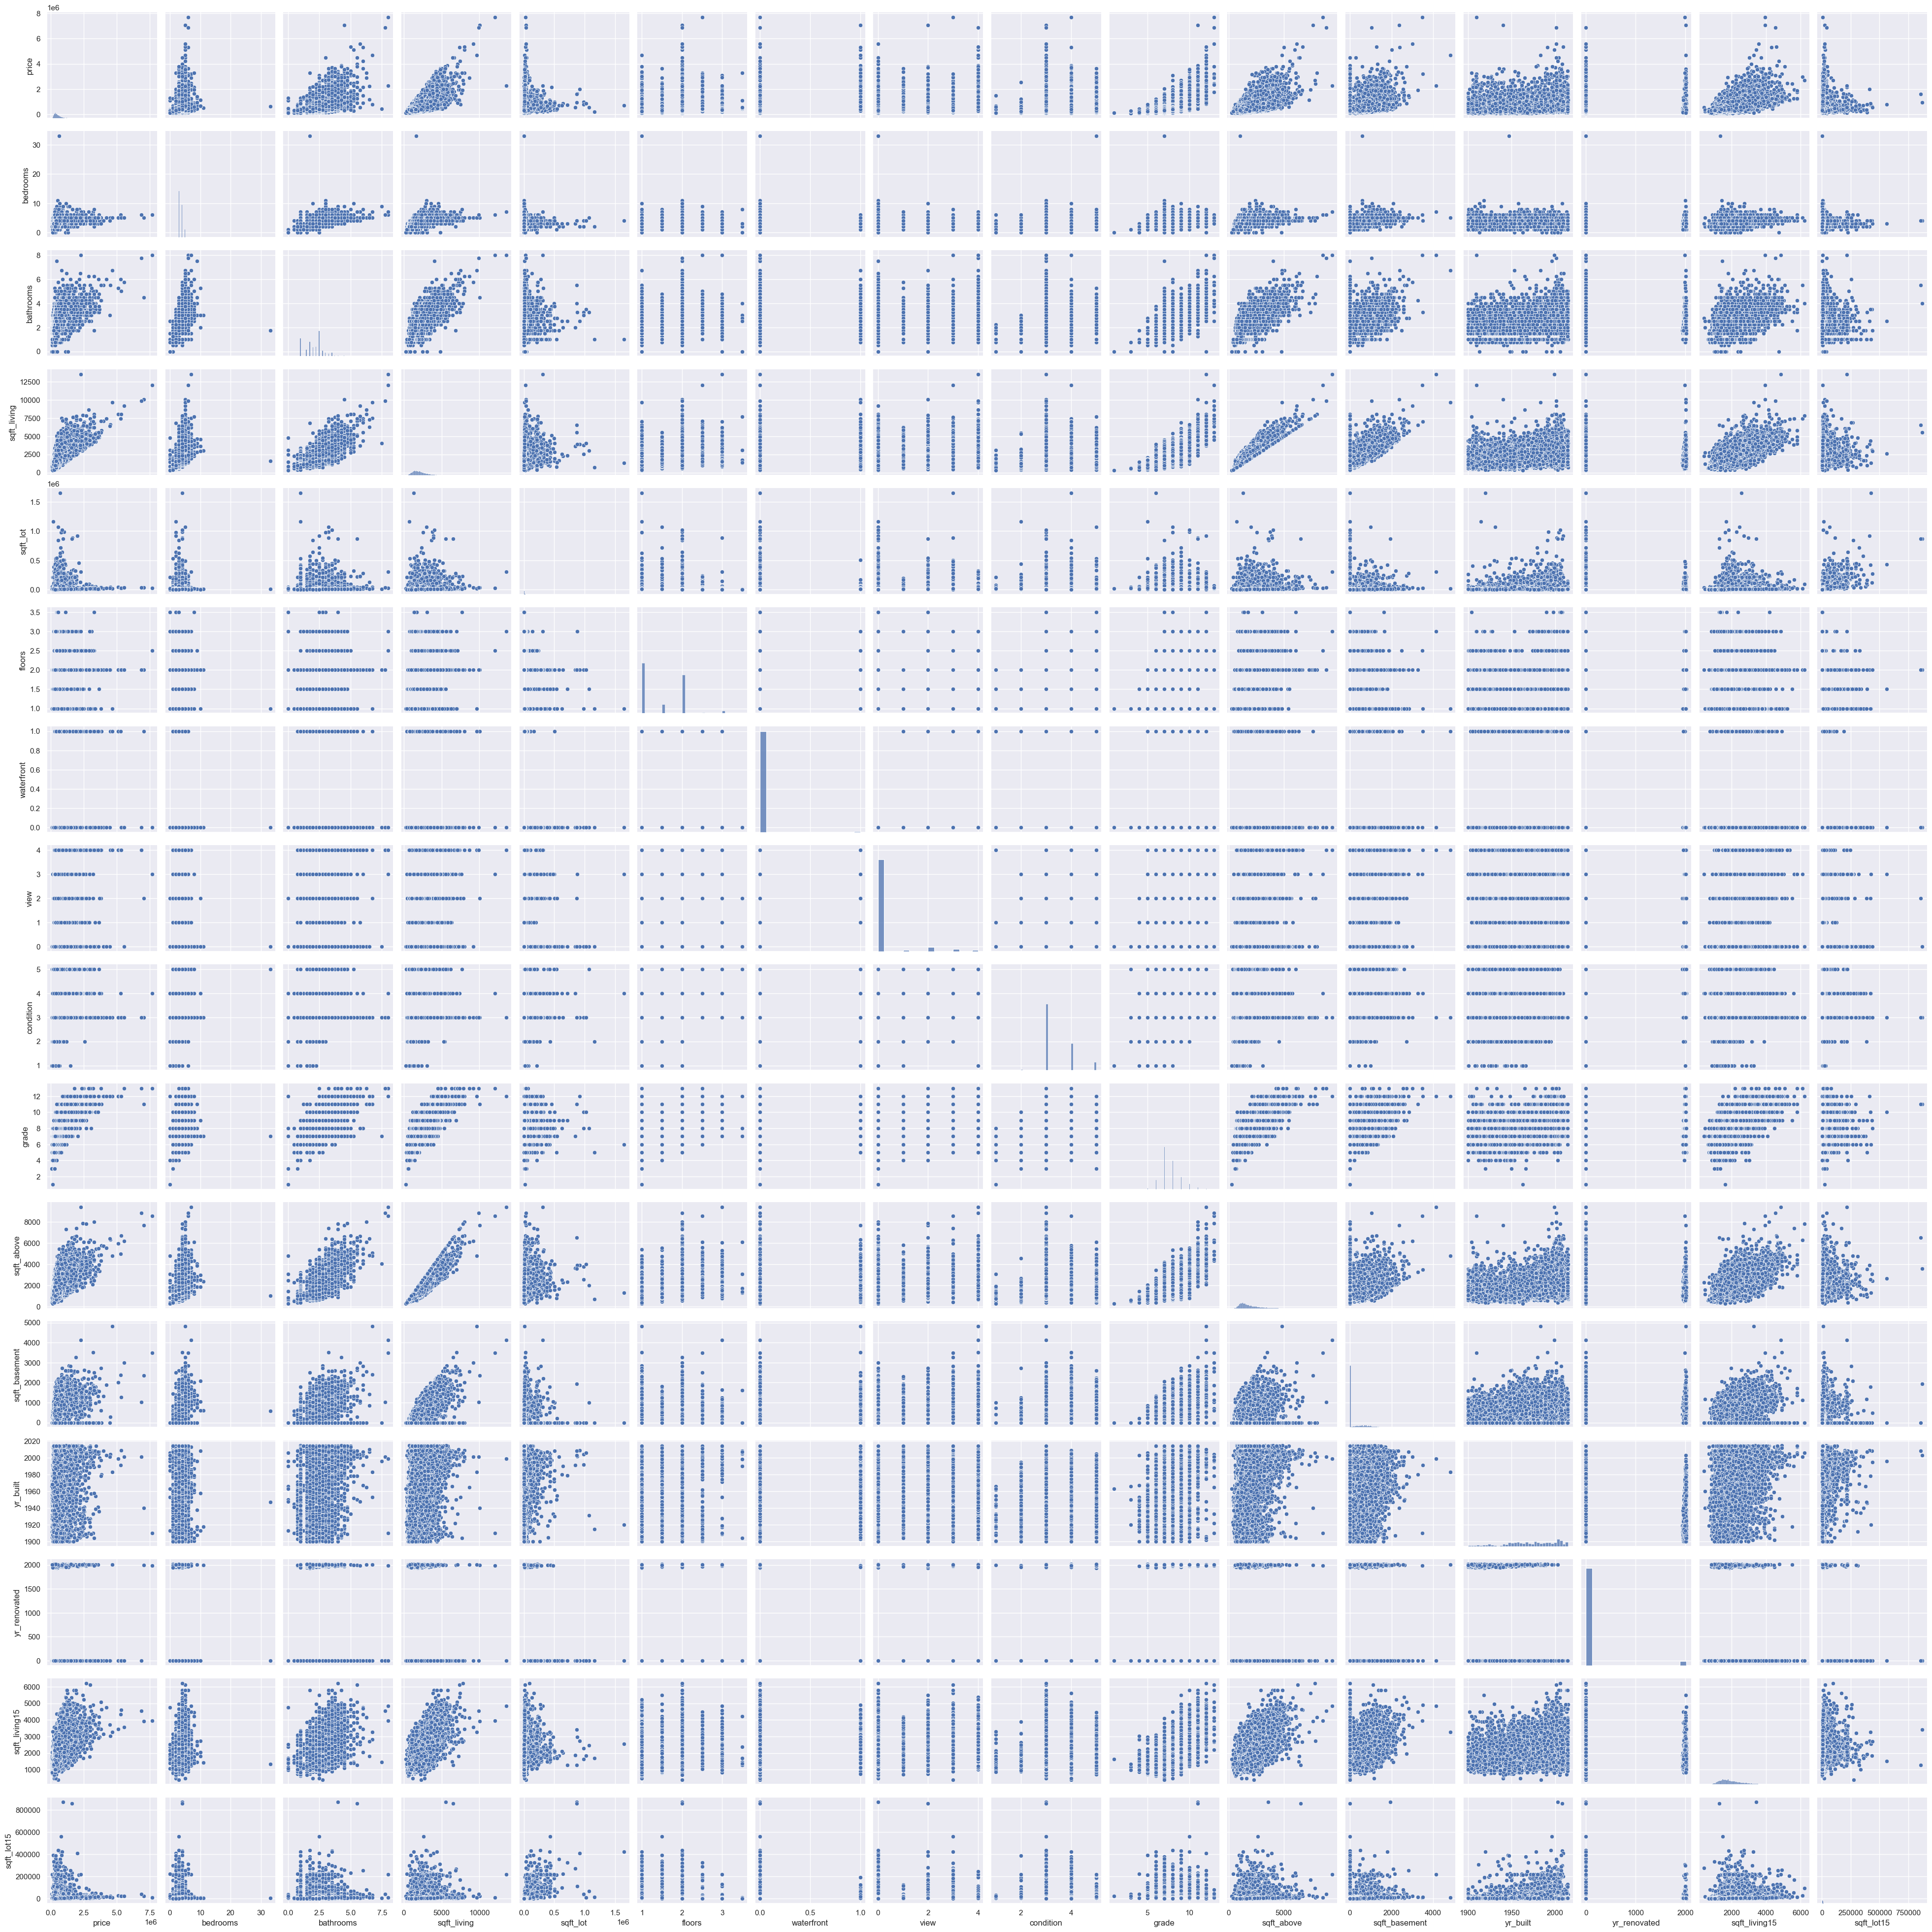

In [35]:
sns.pairplot(data = df_v)

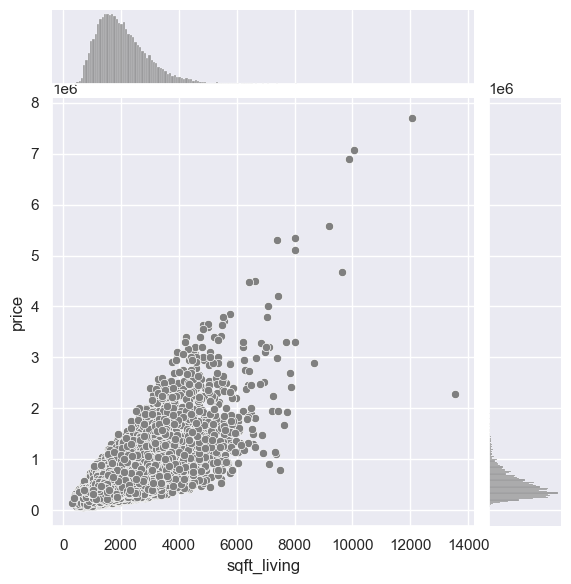

In [36]:
sns.jointplot(x='sqft_living', y='price', data = df_v, color = 'gray')

<center><h1 style = "background:#99d98c ;color:black;border:0;font-weight:bold">Correlation</h1></center>

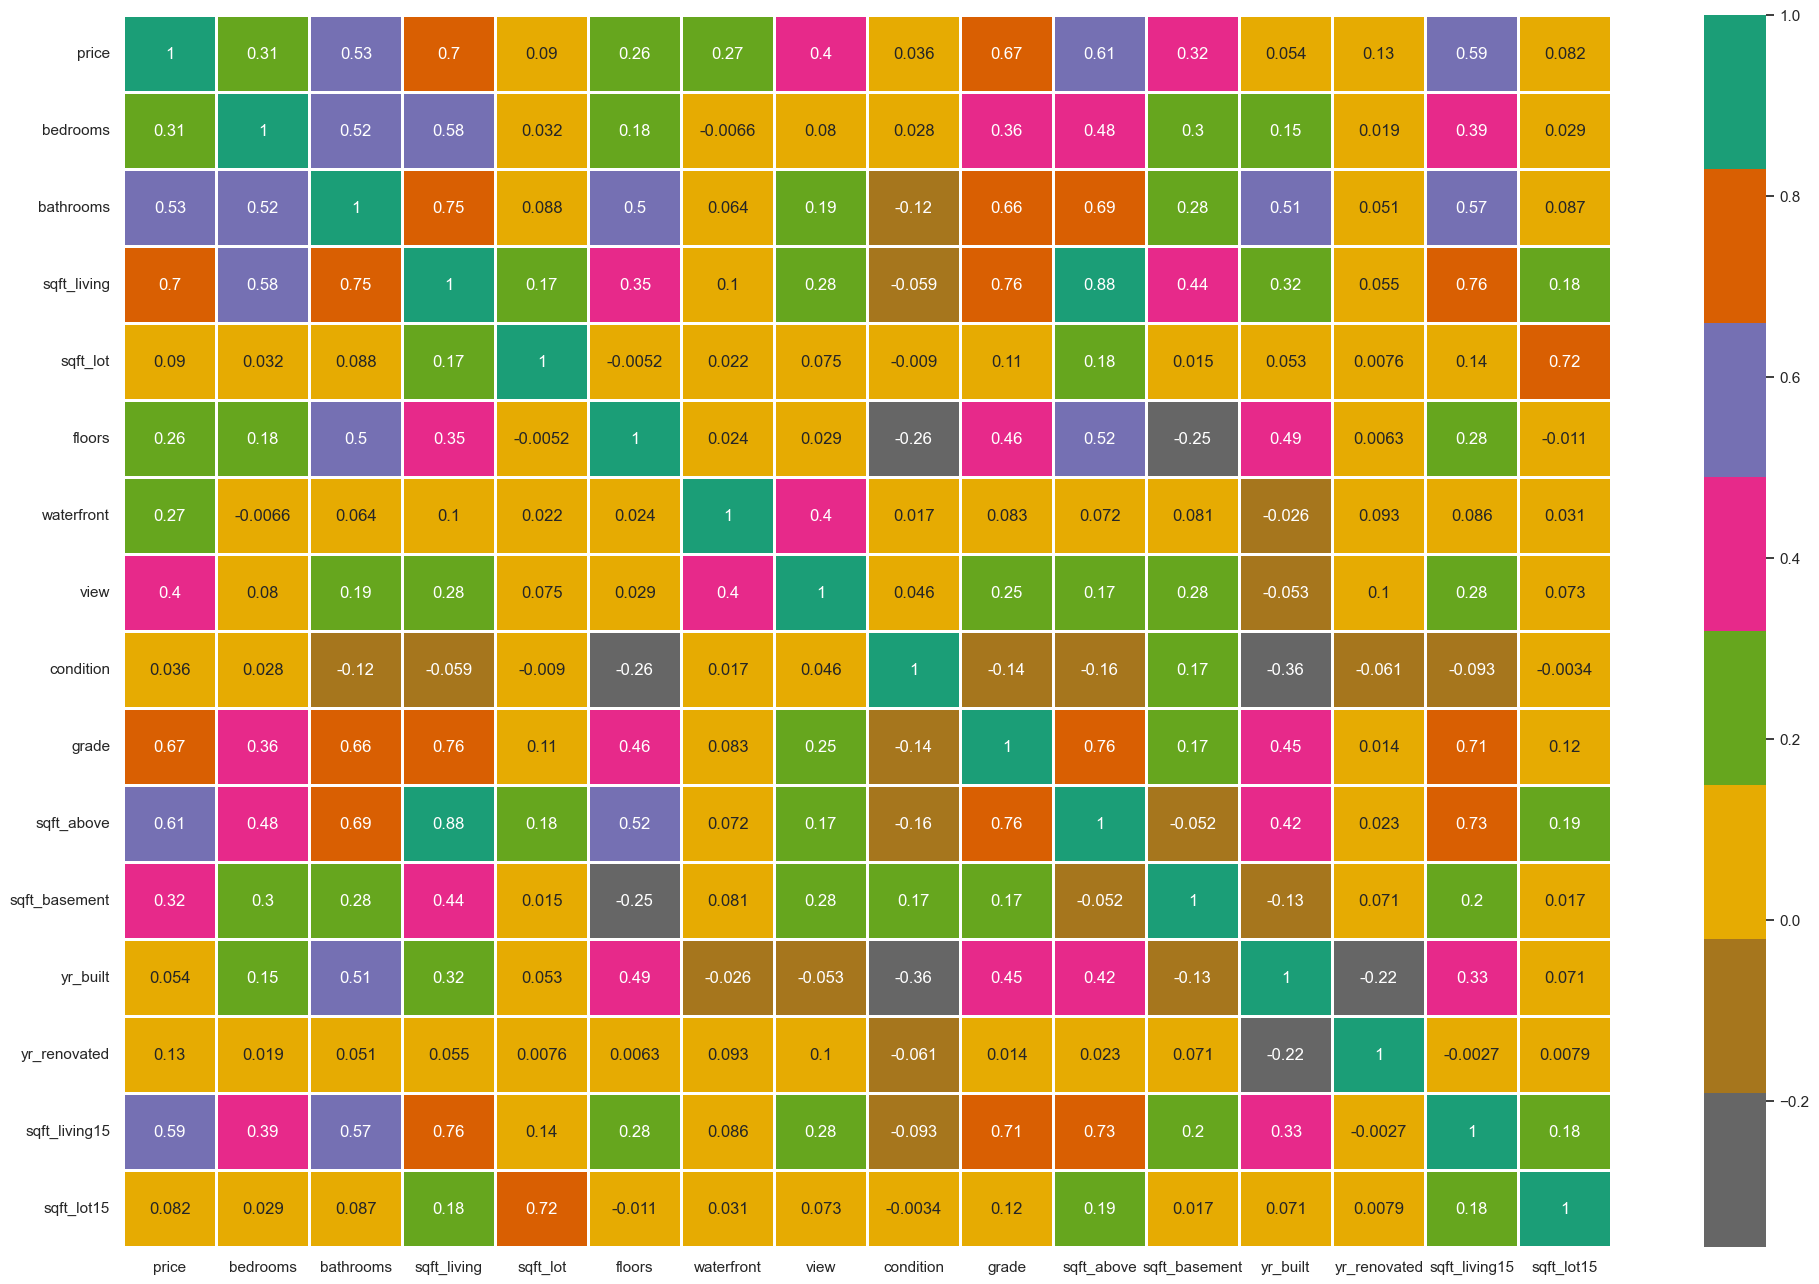

In [37]:
plt.figure(figsize=(24,16)) 
sns.heatmap(df_v.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

<center><h1 style = "background:#99d98c ;color:black;border:0;font-weight:bold">Train-Test Split</h1></center>

In [38]:
from sklearn.model_selection import train_test_split

X = df.drop(["price"],axis =1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

print(f'Total # of sample in whole dataset: {len(X)}')
print("*****"*10)
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Shape of X_train: {X_train.shape}')
print("*****"*10)
print(f'Total # of sample in test dataset: {len(X_test)}')
print(f'Shape of X_test: {X_test.shape}')

Total # of sample in whole dataset: 21613
**************************************************
Total # of sample in train dataset: 17290
Shape of X_train: (17290, 15)
**************************************************
Total # of sample in test dataset: 4323
Shape of X_test: (4323, 15)


In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<center><h1 style = "background:#99d98c ;color:black;border:0;font-weight:bold">Multiple Linear Regression</h1></center>

In [40]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept = True)
model.fit(X_train, y_train)
pred = model.predict(X_test)
 
train_score = model.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = model.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 65.06479293522321
Test score of trained model: 66.46642681281575


In [41]:
print('Linear Model Coefficient (m): ', model.coef_)
print('Linear Model Coefficient (b): ', model.intercept_)

Linear Model Coefficient (m):  [-3.30846895e+04  3.33693087e+04 -2.71251316e+18  9.97132455e+02
  1.68177159e+04  4.88401479e+04  3.28014577e+04  1.40522451e+04
  1.41730266e+05  2.44463473e+18  1.31521360e+18 -1.03801797e+05
  3.94376921e+03  1.80900195e+04 -1.53774336e+04]
Linear Model Coefficient (b):  540402.8866347753


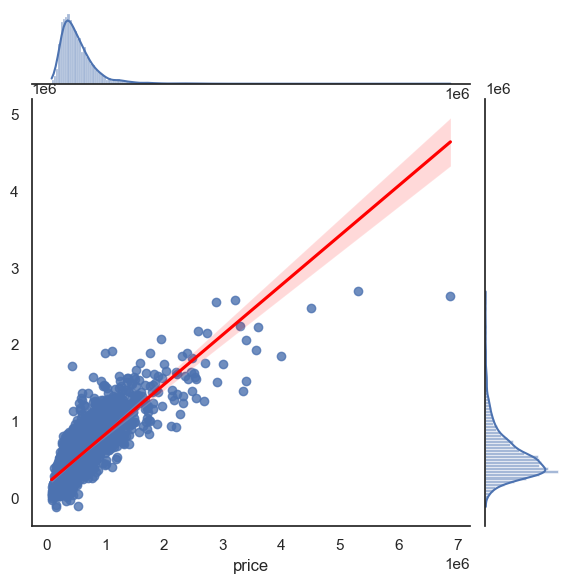

In [42]:
sns.set_theme(style="white")
sns.jointplot(x=y_test, y=pred, kind='reg', line_kws={"color": "red"})

<center><h1 style = "background:#76c893 ;color:black;border:0;font-weight:bold">Evaluation of Model</h1></center>

In [43]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
MAPE = np.mean(np.abs( (y_test-pred) / y_test))*100
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, MAPE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

Metric         Score
0     MSE  4.575035e+10
1    RMSE  2.138933e+05
2     MAE  1.358340e+05
3    MAPE  2.867542e+01
4      r2  6.646643e-01
5  adj_r2  6.634964e-01

<a id = "3"></a>
<center><h1 style = "background:#000000 ;color:white;border:0;font-weight:bold">Polynomial Regression</h1></center>

The hypothesis function is not necessarily linear if it does not fit the data well.

The behavior or curve of the hypothesis function can be changed to a quadratic, cubic, or square root function (or any other form).

Sometimes, there may be a non-linear relationship between the data. One way to try to explain such a relationship is with a polynomial regression model. Such a model for a single predicted X:



Here h is called the degree of polynomial. For lower orders, the relationship has a specific name (i.e. h = 2 is called quadratic, h = 3 is called cubic, h = 4 is called quartic, etc.). Although this model enables a nonlinear relationship between Y and X, polynomial regression is still considered linear regression as the regression coefficients β1, β2, …, βh are linear.

To calculate the above equation, we will only need the response variable (Y) and the predictor variable (X). However, polynomial regression models may also have other predictive variables that can lead to the interaction term. As can be seen, the basic equation for a polynomial regression model above is a relatively simple model, but depending on the situation, the model can grow much larger.

In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./data\EconomiesOfScale.csv
./data\IceCreamData.csv
./data\kc_house_data.csv


<center><h1 style = "background:#590d22 ;color:white;border:0;font-weight:bold">Information About Dataset</h1></center>

In [45]:
df = pd.read_csv('./data/EconomiesOfScale.csv')
df.sample(10)

Number of Units  Manufacturing Cost
886         6.021125           36.095333
776         5.460769           32.588312
358         4.022308           45.246273
47          2.218826           61.093235
383         4.096708           45.691906
851         5.783960           28.295749
842         5.712925           31.357431
854         5.803924           35.285484
261         3.642270           40.382086
211         3.371696           38.754760

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [47]:
df.describe()

Number of Units  Manufacturing Cost
count      1000.000000         1000.000000
mean          4.472799           40.052999
std           1.336241           10.595322
min           1.000000           20.000000
25%           3.594214           32.912036
50%           4.435958           38.345781
75%           5.324780           44.531822
max          10.000000          100.000000

<center><h1 style = "background:#800f2f ;color:white;border:0;font-weight:bold">Data Visualization</h1></center>

<Figure size 1280x960 with 0 Axes>

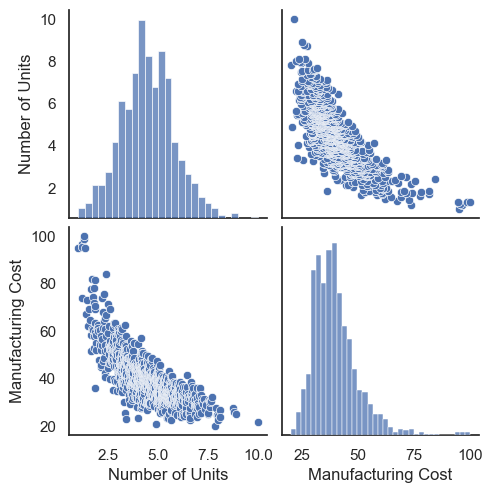

In [48]:
sns.set_theme(style="white")
plt.figure(dpi = (200))
sns.pairplot(df)

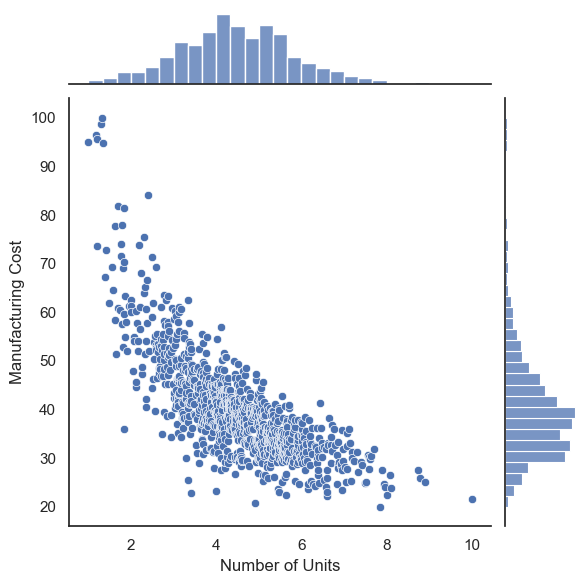

In [49]:
sns.jointplot(x='Number of Units', y='Manufacturing Cost', data = df)

<Figure size 640x480 with 0 Axes>

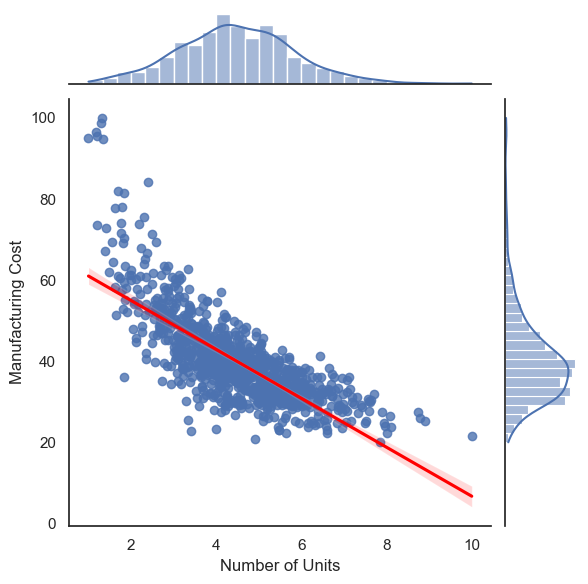

In [50]:
sns.set_theme(style="white")
plt.figure(dpi = (100))
sns.jointplot(x = df['Number of Units'], y = df['Manufacturing Cost'], kind='reg', line_kws={"color": "red"})

<Axes: xlabel='Number of Units', ylabel='Manufacturing Cost'>

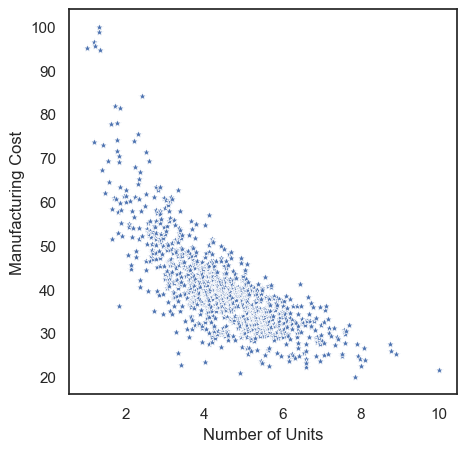

In [51]:
plt.figure(figsize = (5,5), dpi = (100))
sns.scatterplot(x = df['Number of Units'], y = df['Manufacturing Cost'], marker="*")

<center><h1 style = "background:#a4133c ;color:white;border:0;font-weight:bold">Train-Test Split</h1></center>

In [52]:
from sklearn.model_selection import train_test_split

X = df[['Number of Units']]
y = df['Manufacturing Cost']

# We are using entire dataset for training
X_train = X
y_train = y

print(f'Total # of sample in whole dataset: {len(X)}')
print("*****"*10)
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Shape of X_train: {X_train.shape}')
print("*****"*10)

Total # of sample in whole dataset: 1000
**************************************************
Total # of sample in train dataset: 1000
Shape of X_train: (1000, 1)
**************************************************


<center><h1 style = "background:#c9184a ;color:white;border:0;font-weight:bold">Polynomial Regression</h1></center>

In [53]:
from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=6)

In [54]:
X_columns = poly_regressor.fit_transform(X_train)

In [55]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_columns, y_train)

pred = model.predict(poly_regressor.fit_transform(X_train))

Text(0.5, 1.0, 'Unit Cost vs. Number of Units [in Millions](Training dataset)')

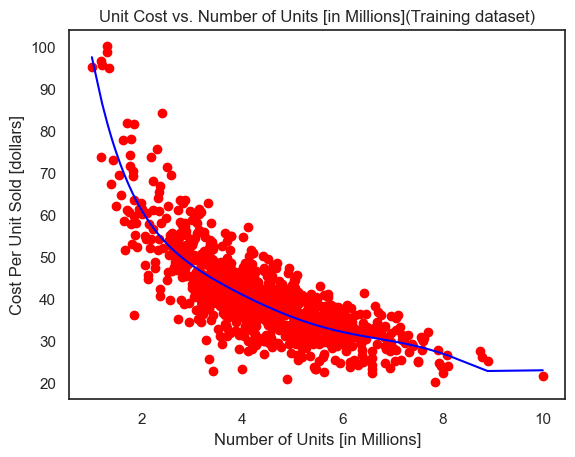

In [56]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, pred, color = 'blue')
plt.ylabel('Cost Per Unit Sold [dollars]')
plt.xlabel('Number of Units [in Millions]')
plt.title('Unit Cost vs. Number of Units [in Millions](Training dataset)')

<center><h1 style = "background:#ff4d6d ;color:white;border:0;font-weight:bold">Optimal Degree</h1></center>

In [57]:
j = 0
plt.figure(figsize=(150,150))

for i in range(1,11):
    poly_regressor = PolynomialFeatures(degree=i)
    X_columns = poly_regressor.fit_transform(X_train)
    
    model = LinearRegression()

    model.fit(X_columns, y_train)

    pred = model.predict(poly_regressor.fit_transform(X_train))
  
    plt.subplot(5,2,j+1)
    plt.scatter(X_train, y_train, color = 'red', s = 115)
    plt.plot(X_train, pred, color = 'blue',linewidth = 5.5)
    plt.ylabel('Cost Per Unit Sold [dollars]')
    plt.xlabel('Number of Units [in Millions]')
    plt.title(f'Unit Cost vs. Number of Units [in Millions](Training dataset) - Degree =  {i}',color = 'black',fontsize = 75)
    j += 1

<a id = "4"></a>
<center><h1 style = "background:#000000 ;color:white;border:0;font-weight:bold">BIAS - VARIANCE TRADEOFF</h1></center>

**Bias** is the difference between the models mean estimate and the true value. If the model has high bias, it oversimplifies the training data. This causes a high error rate in training and test data.

**Variance,** on the other hand, is a value that tells the model prediction variability or spread of data for a given data point. If the model has high variance, instead of finding a pattern that can generalize in the train set, it cannot generalize well to data it has never seen before, since it starts to learn or even memorize the observations in this set. This results in low error in the training data but high error in the test data.

In machine learning, models are fitted to the data, and the loss function is tried to be minimized. If the loss function is very close to 0, the model has a probability of over-fitting, and if it is far from 0, there is a probability of under-fitting. To explain a little more, this is why the loss function is seriously small since the estimated value will be very close to the true value, as the model starts to learn the observations instead of discovering the pattern in the data.

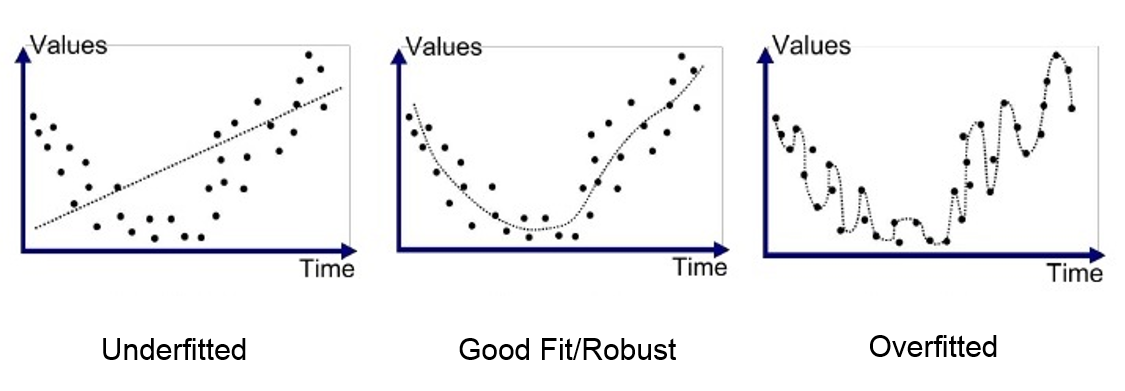

*Soruce for picture:* https://medium.com/greyatom/what-is-underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6803a989c76


* **High Bias Low Variance:** Models are consistent but average error rate is high.

* **High Bias High Variance:** Models are both inaccurate and inconsistent.

* **Low Bias Low Variance:** Models are accurate and consistent on average. We strive to achieve this result in our models.

* **Low Bias High Variance:** Models are somewhat accurate but inconsistent on average. When a small change is made in the data set, it causes a large error rate.

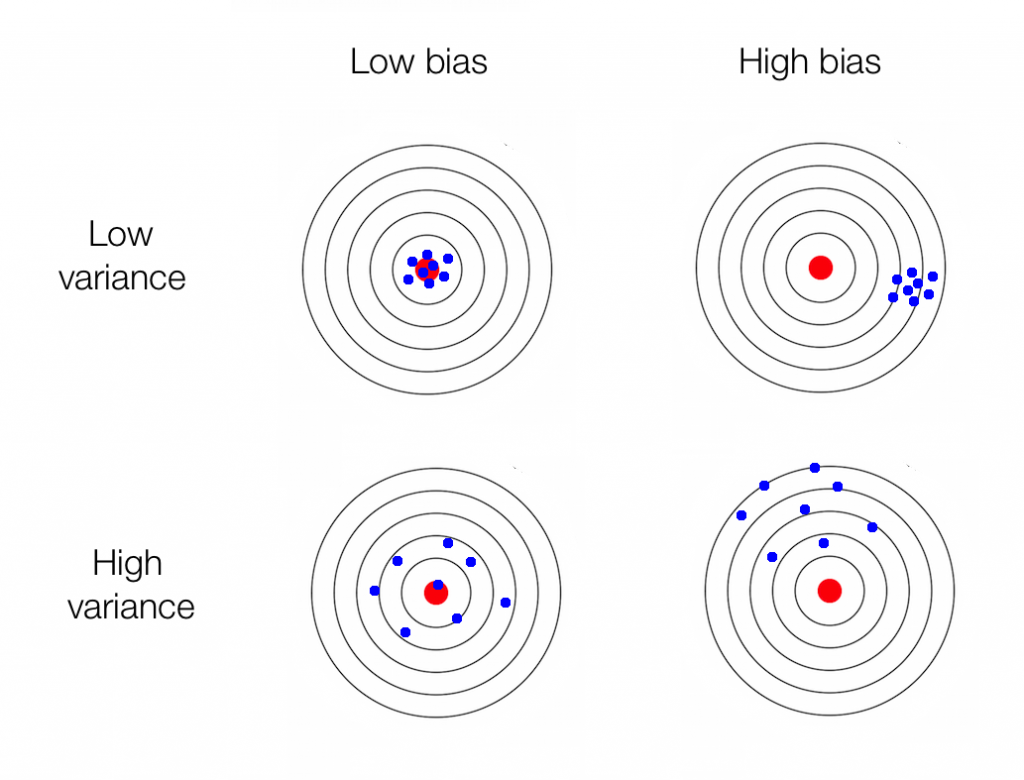

*Soruce for picture:* https://ahmetkuzubasli.medium.com/modeliniz-neden-hala-hatal%C4%B1-bias-ve-variance-6368f36de751

## What is the way to find out if we have high bias or high variance?

#### If the model has high bias, the following results can be encountered;
* The error rate of the training set of the model is high.
* The error rate of the test data set is similar to the training set.

#### If the model has high variance, the following results can be encountered;
* The error rate of the training set of the model is low.
* The error rate of the test data set of the model is high.


## How to avoid overfitting?
If the model has started to memorize the data set used for training more than necessary, or if the training set is monotonous, the risk of overfitting is high. When we give the test data to this model, which has a high score in the training set, we will probably get a very low score. Because the model memorized the situations in the training set and searches for these situations in the test data set. Very bad prediction scores will be obtained in the test data set, since there will be no memorized cases in the slightest change. Models with overfitting problems have high variance and low bias.

This usually happens when the model is very complex (i.e. too many features/variables compared to the number of observations). This model will have very high prediction accuracy on training data, but probably not very accurate on untrained or new data. This problem stems from the model's inability to generalize. Such models learn or explain the "noise" in the training data rather than the actual relationships between the variables in the data.

The overfitting problem can be solved by applying the following methods;

* **Adding more data:** If the training set is uniform, data diversity should be increased by adding more data.
* **Ensembling:** It is a machine learning method that allows to use separate models together. Thus, the model can work with more complex structured data without overfit.
* **Reducing the number of features:** Columns that are highly correlated with each other can be deleted or a single variable can be created from these variables by methods such as factor analysis.
* **Cross Validation:** An important technique in Machine Learning applied to predict model accuracy on unseen data. It does the training by dividing the data set into k pieces, it uses 1 piece from these k pieces for testing, this piece is different from the previous iteration each time, so the model is constantly tested with a new test set.
* **Regularization:** Regularization is a technique used to reduce the complexity of the model. It does this by penalizing the loss function. In other words, it reduces the effect of these variables by reducing the weight of the variables with high weight in the model. This method helps to solve the over-learning problem. The loss function is the sum of the squares of the difference between the actual value and the predicted value. To reduce the weight of the variables, it is necessary to increase the regularization value. **Lasso** and **Ridge** Regularization methods are techniques used for this purpose.


## How to avoid underfitting?
Unlike overfitting, if a model has underfitting, it means that the model does not fit the training data and therefore misses trends in the data. It also means that the model cannot be generalized for new data. This problem is often the result of a very simple model.
Models with underfitting problems have a high error rate in both training and test data sets. It has low variance and high bias. Instead of following the training data too closely, these models ignore the lessons learned from the training data and fail to learn the fundamental relationship between inputs and outputs.

* **Simple model structure:** The constructed model is so simple that it cannot fully learn the relationship between input and output data. The high train error shows that the machine learning model is very simple.

* **Missing data:** Another reason for underfitting can be a lack of data. For example, when the results depend on more than one variable, training performance will be low if one tries to learn through only one variable.

* **Insufficient data:** The amount of data must be sufficient if models are expected to yield high success rates. If there is not enough data, the model will have trouble finding a pattern between the input data and the results.

* **Noisy data:** If the data is too noisy, machine learning techniques will have learning difficulties and will not be able to generalize. Noisy data should be reduced so that the model does not think that the data is randomly generated.

<center><h1 style = "background:#582f0e ;color:white;border:0;font-weight:bold">Information About Dataset</h1></center>

In [58]:
df = pd.read_csv('./data/kc_house_data.csv')
df.sample(10)

id             date      price  bedrooms  bathrooms  \
14896  7214400095  20141027T000000   667500.0         3       2.00   
6333   2624049169  20141211T000000   400000.0         3       1.50   
12667  4036800770  20140917T000000   375000.0         4       1.50   
21603  7852140040  20140825T000000   507250.0         3       2.50   
46     8945200830  20150325T000000   210490.0         3       1.00   
127    8732020310  20140717T000000   260000.0         4       2.25   
10218   730000139  20141016T000000   305000.0         2       1.50   
2320   1118000465  20150312T000000  1810000.0         3       3.50   
19009  1604600227  20150328T000000   441000.0         2       1.00   
6395   8148600020  20140926T000000   170000.0         2       1.00   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
14896         2040      4841     1.0           0     0  ...      7   
6333          1890      6183     1.0           0     0  ...      7   
12667         1770      6650     1.0           0     0  ...      7   
21603         2270      5536     2.0           0     0  ...      8   
46             990      8528     1.0           0     0  ...      6   
127           2160      8811     1.0           0     0  ...      8   
10218          800      2142     2.0           0     0  ...      7   
2320          3780      8295     2.0           0     0  ...      9   
19009         1150      3000     1.0           0     0  ...      6   
6395           870      6537     1.0           0     0  ...      6   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
14896        1020           1020      1949             0    98115  47.6778   
6333         1090            800      1967             0    98118  47.5396   
12667        1770              0      1958             0    98008  47.6011   
21603        2270              0      2003             0    98065  47.5389   
46            990              0      1966             0    98023  47.3066   
127          1360            800      1978             0    98023  47.3129   
10218         800              0      2006             0    98144  47.5917   
2320         2430           1350      1951             0    98112  47.6394   
19009         780            370      1915             0    98118  47.5624   
6395          870              0      1948             0    98168  47.4906   

          long  sqft_living15  sqft_lot15  
14896 -122.302           1600        4841  
6333  -122.269           1750        6183  
12667 -122.124           1600        7000  
21603 -121.881           2270        5731  
46    -122.371           1228        8840  
127   -122.390           2090        8400  
10218 -122.297           1320        2742  
2320  -122.290           3780        9127  
19009 -122.291           1150        5000  
6395  -122.306           1100        8701  

[10 rows x 21 columns]

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [60]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [61]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)

<center><h1 style = "background:#7f4f24 ;color:white;border:0;font-weight:bold">Data Visualization</h1></center>

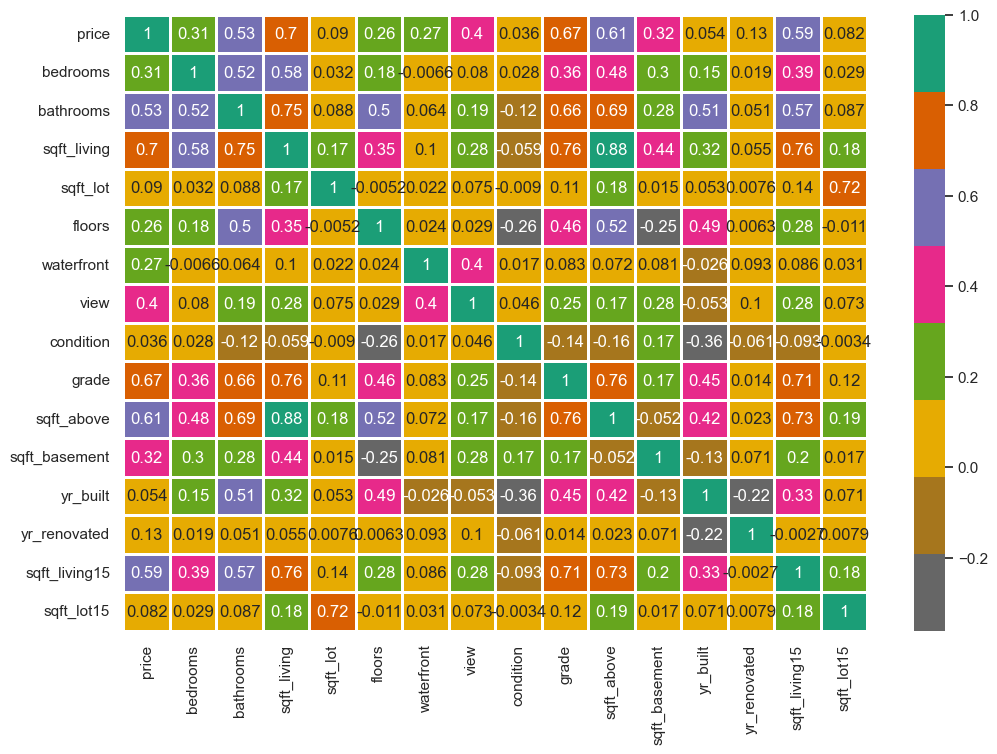

In [62]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

<center><h1 style = "background:#936639 ;color:white;border:0;font-weight:bold">Train-Test Split</h1></center>

In [63]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Total # of sample in whole dataset: {len(X)}')
print("*****"*10)
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Shape of X_train: {X_train.shape}')
print("*****"*10)
print(f'Total # of sample in test dataset: {len(X_test)}')
print(f'Shape of X_test: {X_test.shape}')

Total # of sample in whole dataset: 21613
**************************************************
Total # of sample in train dataset: 19451
Shape of X_train: (19451, 15)
**************************************************
Total # of sample in test dataset: 2162
Shape of X_test: (2162, 15)


<a id = "6"></a>
<center><h1 style = "background:#a68a64 ;color:white;border:0;font-weight:bold">Ridge Regression (L2 Regularization)</h1></center>

* It is used to analyze multivariate regression data. 
* The aim is to find the coefficients that minimize the sum of squares error by applying a penalty to these coefficients. 
* It is resistant to over-fitting. 
* It offers a solution to multidimensionality. 
* It establishes a model with all variables, does not remove irrelevant variables, only brings their coefficients closer to zero.
* It is necessary to find a good value for alpha (penalty) when building the model.


In [65]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.001)
ridge.fit(X_train, y_train)

pred = ridge.predict(X_test)

train_score = ridge.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = ridge.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 65.29196653124254
Test score of trained model: 65.79722264654258


e:\workspace\foundations-of-machine-learning\env\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.00732e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [66]:
k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

Metric         Score
0     MSE  5.388592e+10
1    RMSE  2.321334e+05
2     MAE  1.374801e+05
3      r2  6.579722e-01
4  adj_r2  6.555815e-01

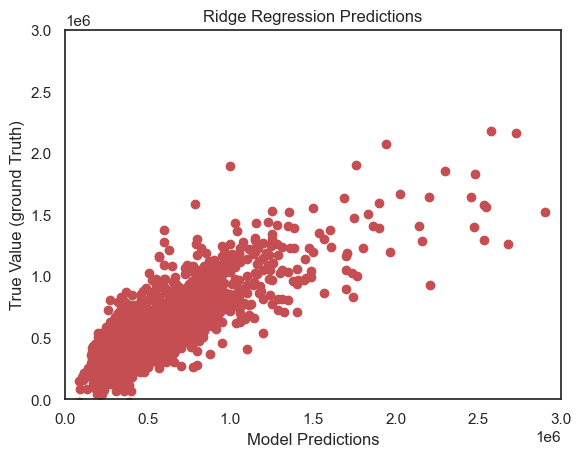

In [67]:
plt.plot(y_test, pred, "o", color = 'r')
plt.xlim(0, 3000000)
plt.ylim(0, 3000000)

plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Ridge Regression Predictions')
plt.show()

<a id = "7"></a>
<center><h1 style = "background:#b6ad90 ;color:white;border:0;font-weight:bold">Lasso Regression (L1 Regularization)</h1></center>

* It performs both variable selection and regularization in order to increase the prediction accuracy and interpretability of the model it produces. 
* Just like in ridge regression, the aim is to find the coefficients that minimize the sum of squares error by applying penalties to the coefficients. But unlike ridge regression, it sets the coefficients of irrelevant variables equal to zero.

In [68]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.001)
lasso.fit(X_train, y_train)

pred = lasso.predict(X_test)

train_score = lasso.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = lasso.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 65.29196653133822
Test score of trained model: 65.79723170835638


e:\workspace\foundations-of-machine-learning\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.053e+14, tolerance: 2.572e+11
  model = cd_fast.enet_coordinate_descent(


In [69]:
k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

Metric         Score
0     MSE  5.388590e+10
1    RMSE  2.321334e+05
2     MAE  1.374801e+05
3      r2  6.579723e-01
4  adj_r2  6.555816e-01

<a id = "8"></a>
<center><h1 style = "background:#c2c5aa ;color:white;border:0;font-weight:bold">Elastic Net</h1></center>

The goal is the same as ridge and lasso regression, but elastic net combines ridge and lasso regression. Ridge regression style penalization and lasso regression style variable selection.

In [70]:
from sklearn.linear_model import ElasticNet

e_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
e_net.fit(X_train, y_train)

pred = e_net.predict(X_test)

train_score = e_net.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = e_net.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 64.08079654274167
Test score of trained model: 63.816544884406


e:\workspace\foundations-of-machine-learning\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.730e+14, tolerance: 2.572e+11
  model = cd_fast.enet_coordinate_descent(


In [71]:
k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

Metric         Score
0     MSE  5.700644e+10
1    RMSE  2.387602e+05
2     MAE  1.392163e+05
3      r2  6.381654e-01
4  adj_r2  6.356363e-01

# Conclusion

We have come to the end of the notebook. I covered basic regression techniques and problems in this notebook. I hope you liked it.

* If you have questions, please comment them. I will try to explain if you don't understand.
* Waiting for your positive and negative comments. :)

Thank you for your time.
